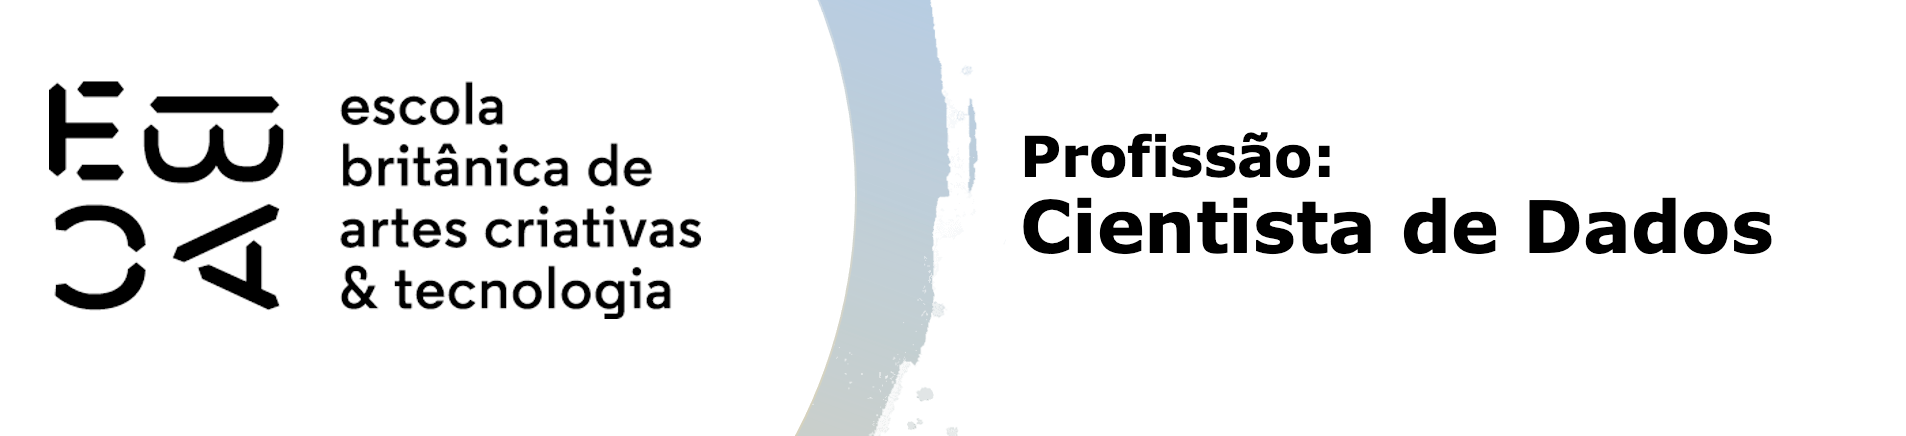

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#sklearn
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import pdist, squareform
from gower import gower_matrix


In [59]:
df = pd.read_csv('online_shoppers_intention.csv')

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [60]:
def plot_distribuicao(data:pd.DataFrame,colunas_plot:int=3):
    """
    Função para plotar histogramas de todas as colunas de um DataFrame.
    
    Parâmetros:
    data (DataFrame): DataFrame contendo os dados a serem plotados.
    colunas_plot (int): Número de colunas do gráfico
    
    Retorna: None
    """

    num_linhas = int(np.ceil(len(data.columns) / colunas_plot))

    fig, axes = plt.subplots(num_linhas, colunas_plot, figsize=(15, num_linhas * 5))

    for i, coluna in enumerate(data.columns):
        row = i // colunas_plot
        col = i % colunas_plot
        sns.histplot(df[coluna], kde=True, ax=axes[row, col])
        axes[row, col].set_title(coluna)

    # Remove subplots vazios
    for j in range(i + 1, num_linhas * colunas_plot):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()

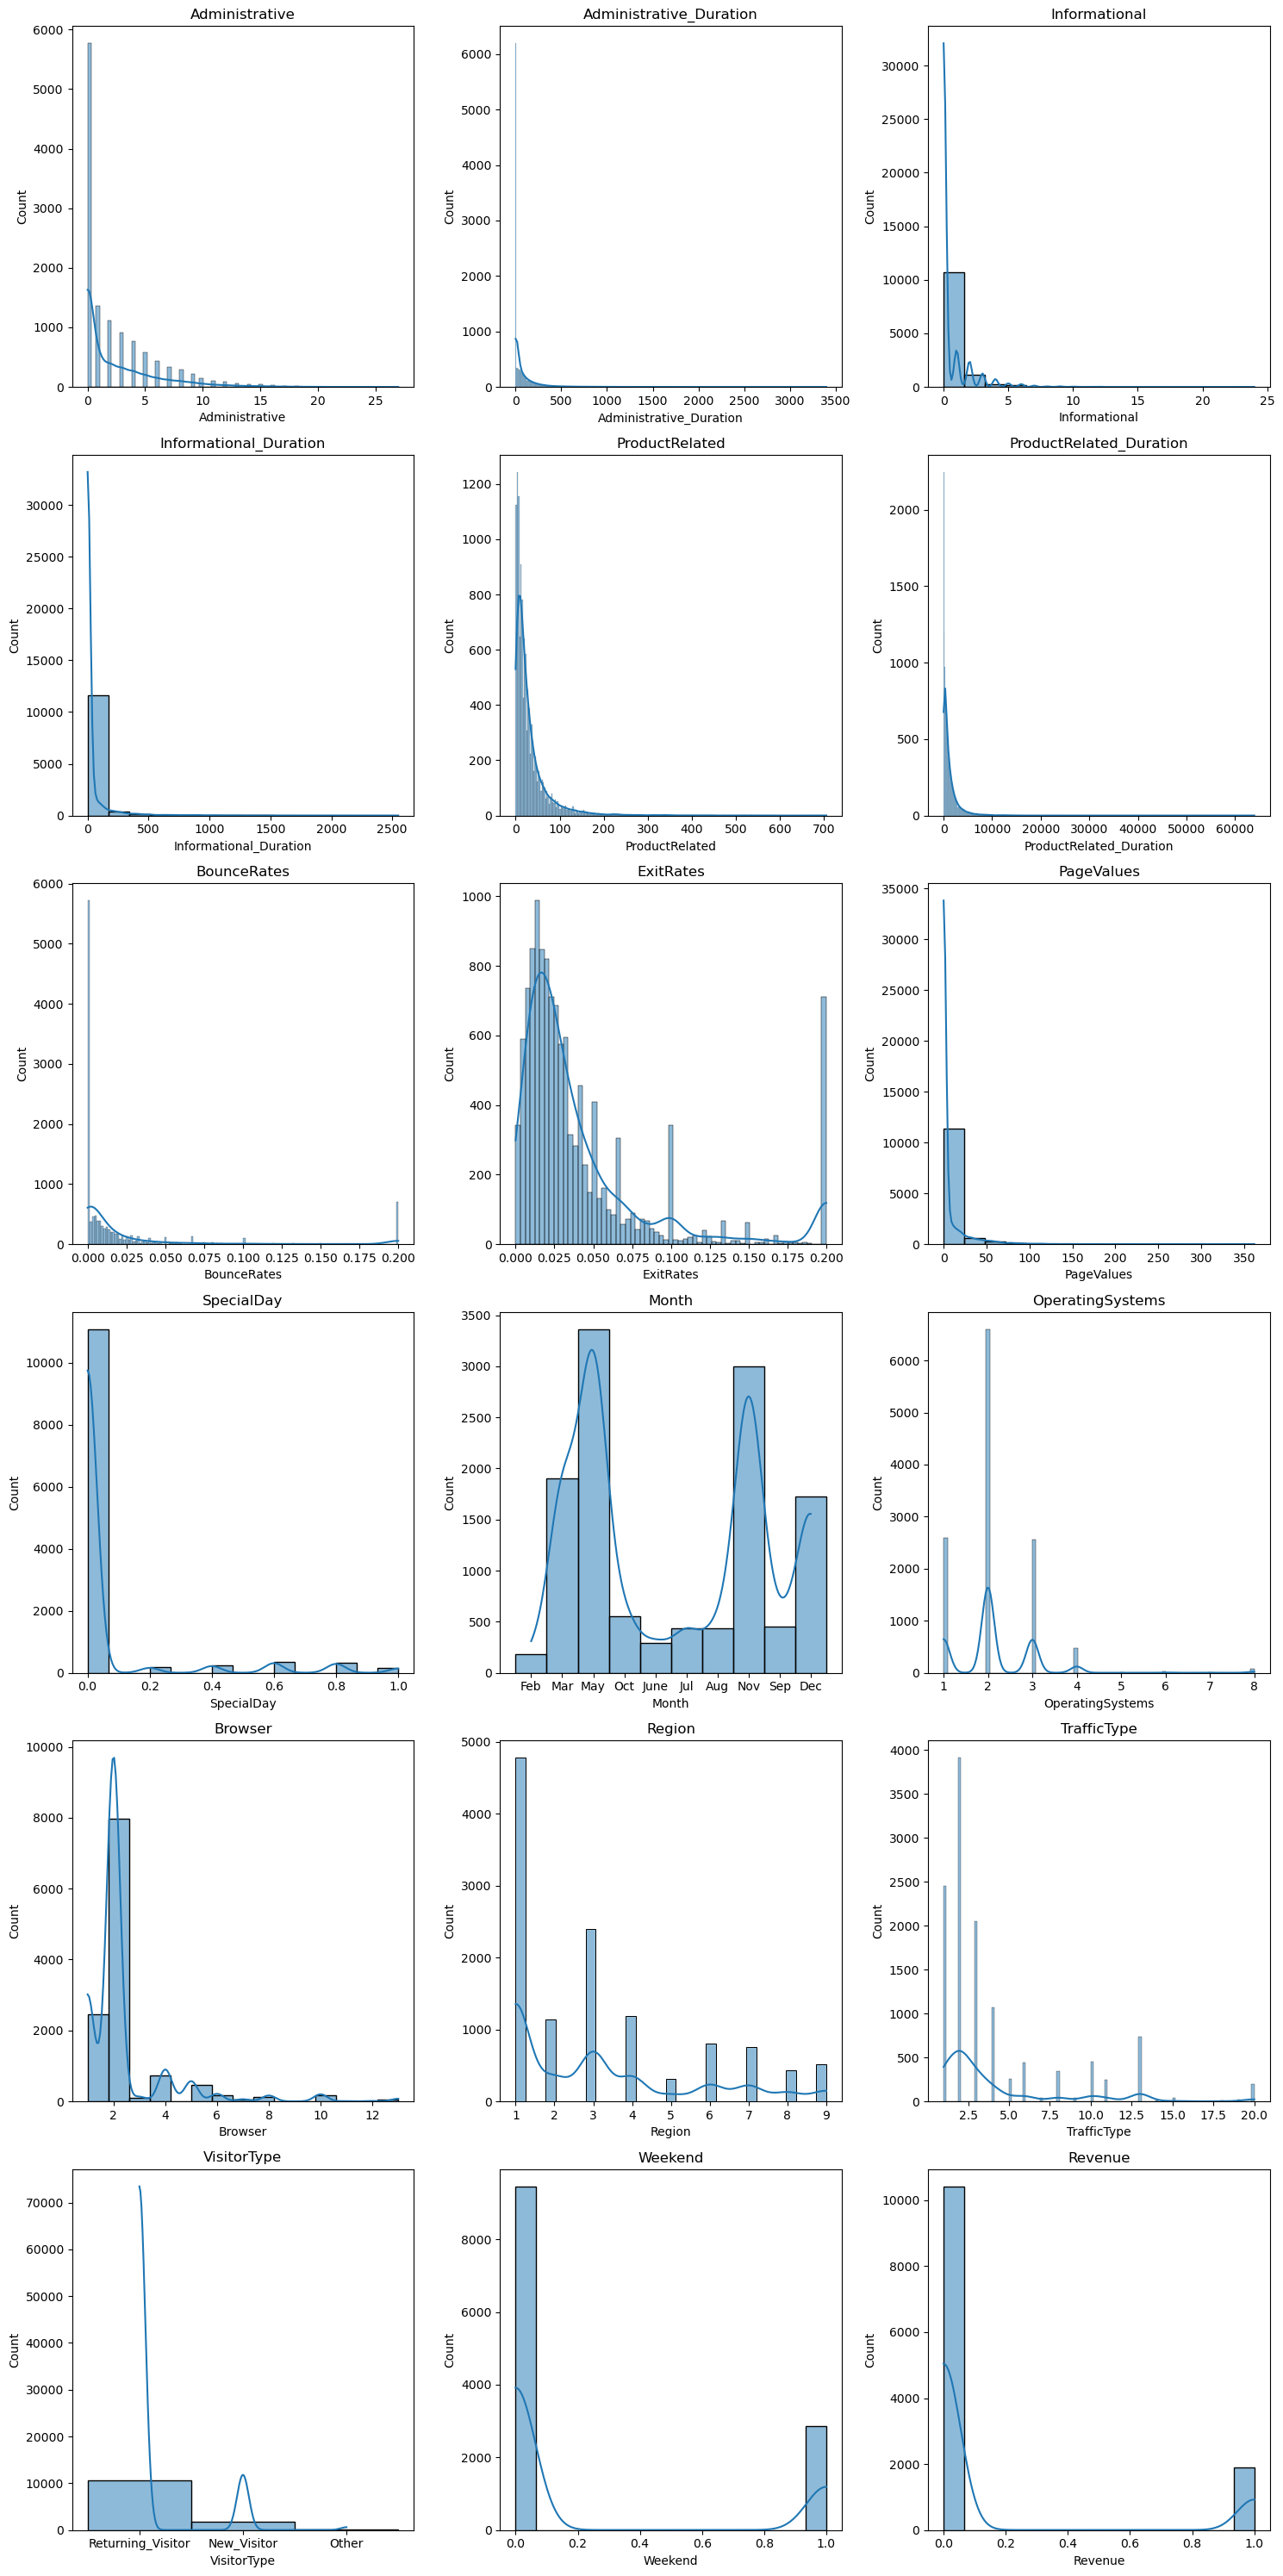

In [61]:
plot_distribuicao(df)

In [62]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [ ]:
#listando as variáveis para utilização
variaveis = [
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'SpecialDay',
    'Weekend',
    'Month'
    ]
variaveis

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'SpecialDay',
 'Weekend',
 'Month']

In [ ]:
#atribuindo as variáveis e padronizando as variáveis quantitativas
df_variaveis = df[variaveis]
df_variaveis[df_variaveis.select_dtypes('number').columns] = pd.DataFrame(StandardScaler().fit_transform(df_variaveis.select_dtypes('number')), columns = df_variaveis.select_dtypes('number').columns)
df_variaveis.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Weekend,Month
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,-0.308821,False,Feb
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.308821,False,Feb
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,-0.308821,False,Feb
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,-0.308821,False,Feb
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.308821,True,Feb


In [65]:
#convertente as variaveis qualitativas em dummie
df_variaveis_dummie = pd.get_dummies(df_variaveis)
df_variaveis_dummie.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,-0.308821,False,False,False,True,False,False,False,False,False,False,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.308821,False,False,False,True,False,False,False,False,False,False,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,-0.308821,False,False,False,True,False,False,False,False,False,False,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,-0.308821,False,False,False,True,False,False,False,False,False,False,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.308821,True,False,False,True,False,False,False,False,False,False,False


In [66]:
#Criando lista das variáveis para tratamento posterior
df_variaveis_dummie.select_dtypes(include=['bool']).columns
vars_cat = [True if x in df_variaveis_dummie.select_dtypes(include=['bool']).columns else False for x in df_variaveis_dummie.columns]
vars_cat

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [67]:
#Usando a função gower_matrix para calcular as distancias das variáveis categoricas
distancia_gower = gower_matrix(df_variaveis_dummie, cat_features=vars_cat)

#ajuste do formato da matrix 
gdv = squareform(distancia_gower,force='tovector')
gdv.shape

(76008285,)

In [68]:
# Calcula a ligação hierárquica
Z = linkage(gdv, method='complete')

In [85]:
#fazendo o agrupamento
# Forma 3 grupos
grupos_3 = fcluster(Z, 3, criterion='maxclust')

# Forma 4 grupos
grupos_4 = fcluster(Z, 4, criterion='maxclust')



In [90]:
#grupo3
valores_unicos, contagens = np.unique(grupos_3, return_counts=True)
print("Grupos:", valores_unicos)
print("Quantidade:",contagens)

Grupos: [1 2 3]
Quantidade: [   3 3547 8780]


In [91]:
#grupo3
valores_unicos, contagens = np.unique(grupos_4, return_counts=True)
print("Grupos:", valores_unicos)
print("Quantidade:",contagens)

Grupos: [1 2 3 4]
Quantidade: [   3 3547 5349 3431]


Leaves = 11477


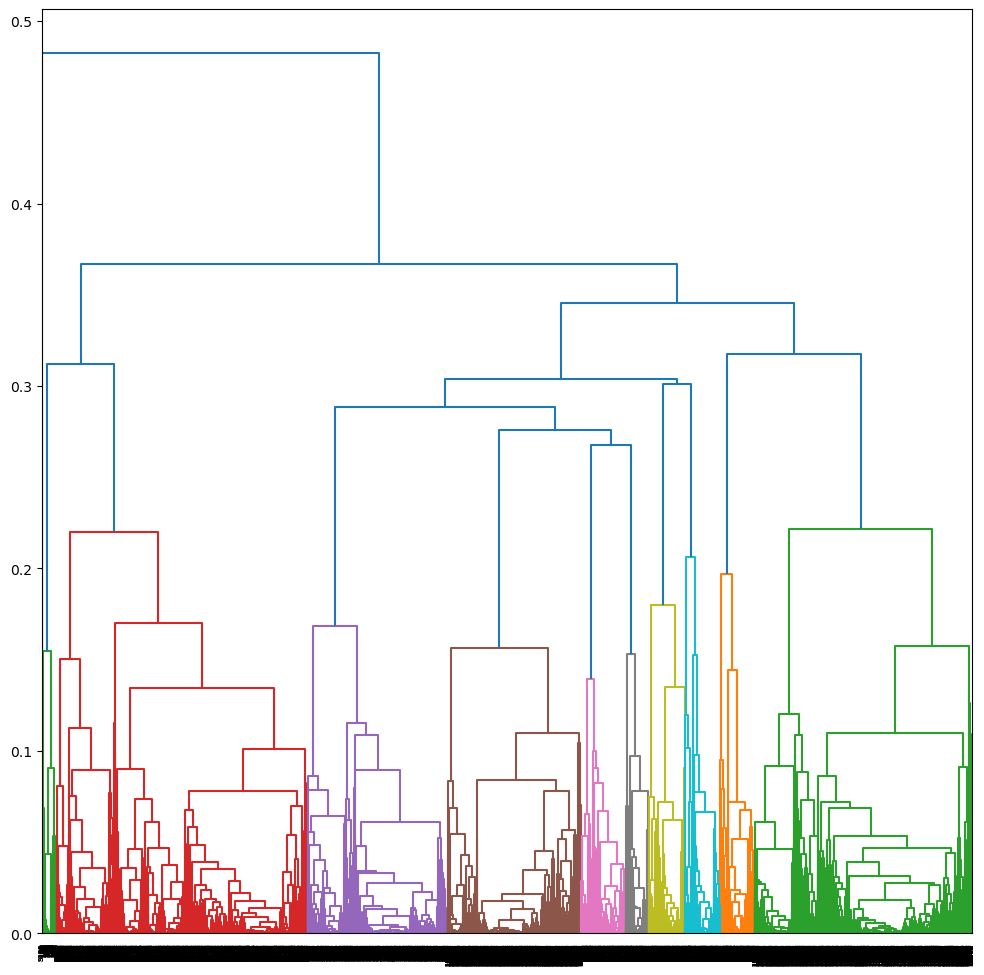

In [96]:
#Exibe o Dendrograma
fig,axs = plt.subplots(1,1,figsize=(12,12))
dn = dendrogram(Z, truncate_mode='level',p=30,show_leaf_counts=True,ax=axs, color_threshold=.24)
print(f"Leaves = {len(dn['leaves'])}")

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

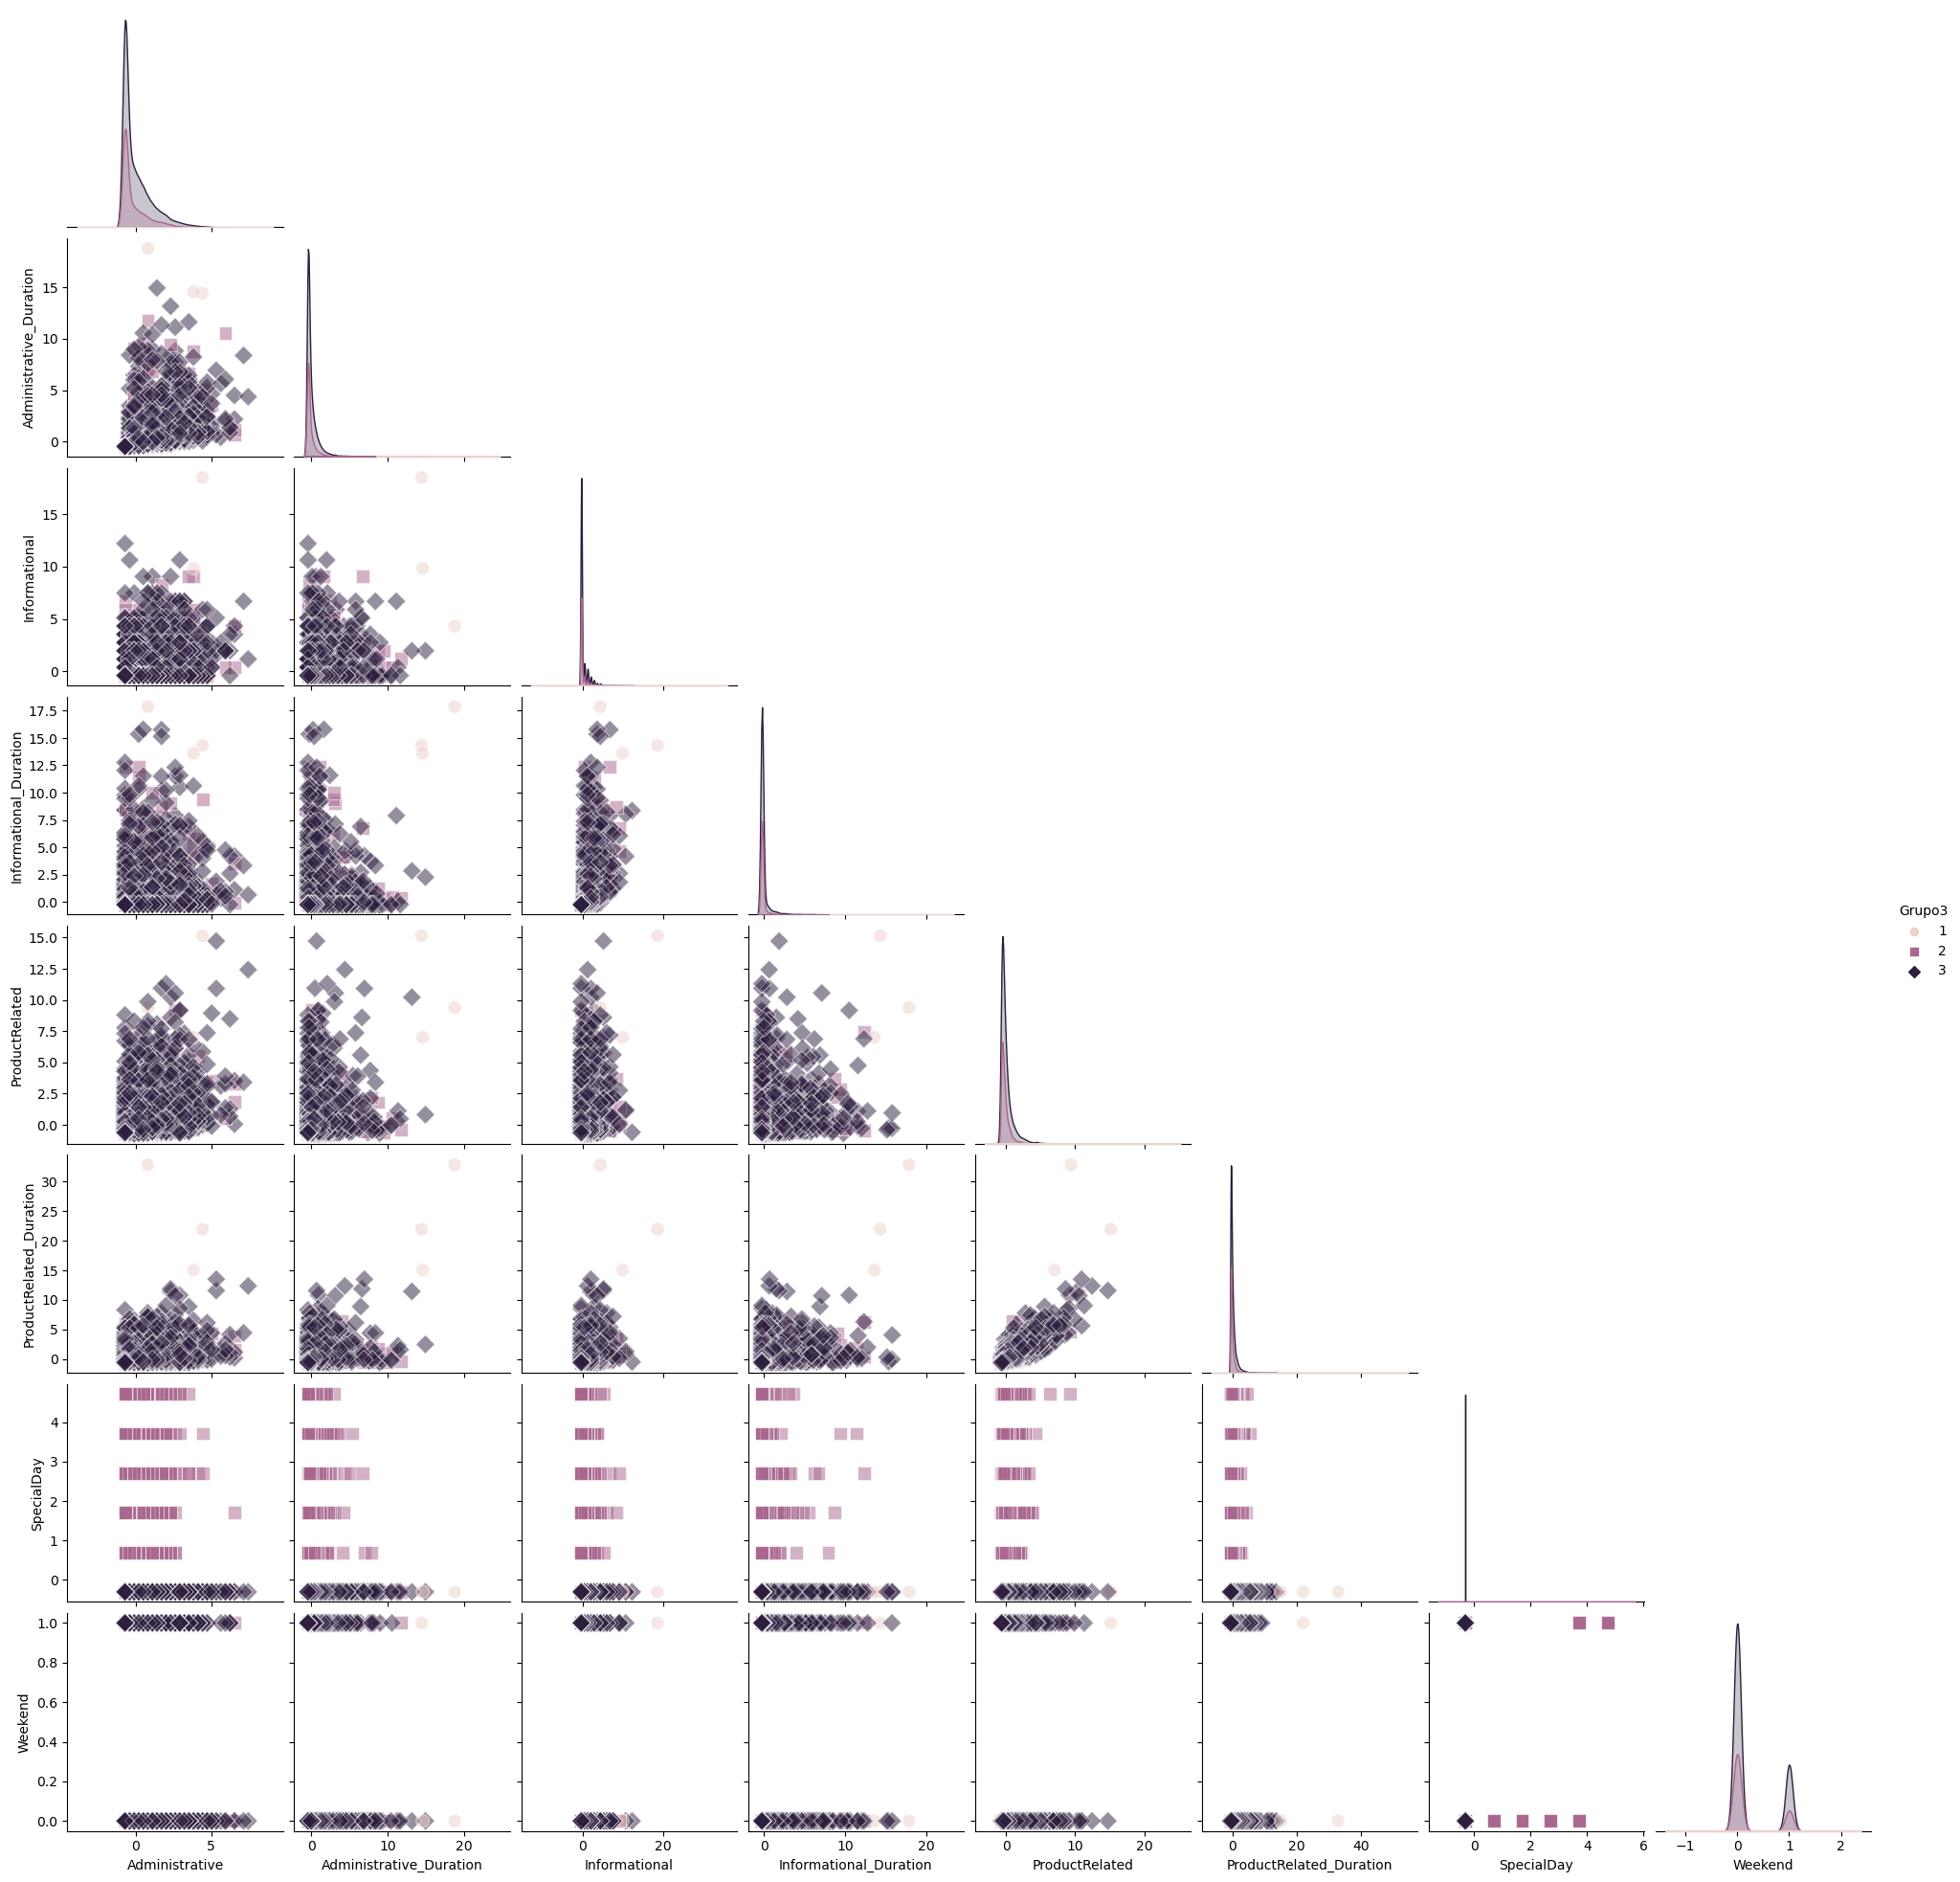

In [ ]:
#análise a partir de 3 grupos
df_grupo3 = df_variaveis.copy()
df_grupo3['Grupo3'] = grupos_3

species_to_marker = {1: 'o', 2: 's', 3: 'D'}
scatter_kws = {'s': 100, 'alpha': 0.5, 'style': df_grupo3['Grupo3'],  'markers': species_to_marker}


sns.pairplot(df_grupo3,
             hue="Grupo3",
             plot_kws=scatter_kws,
             corner=True)


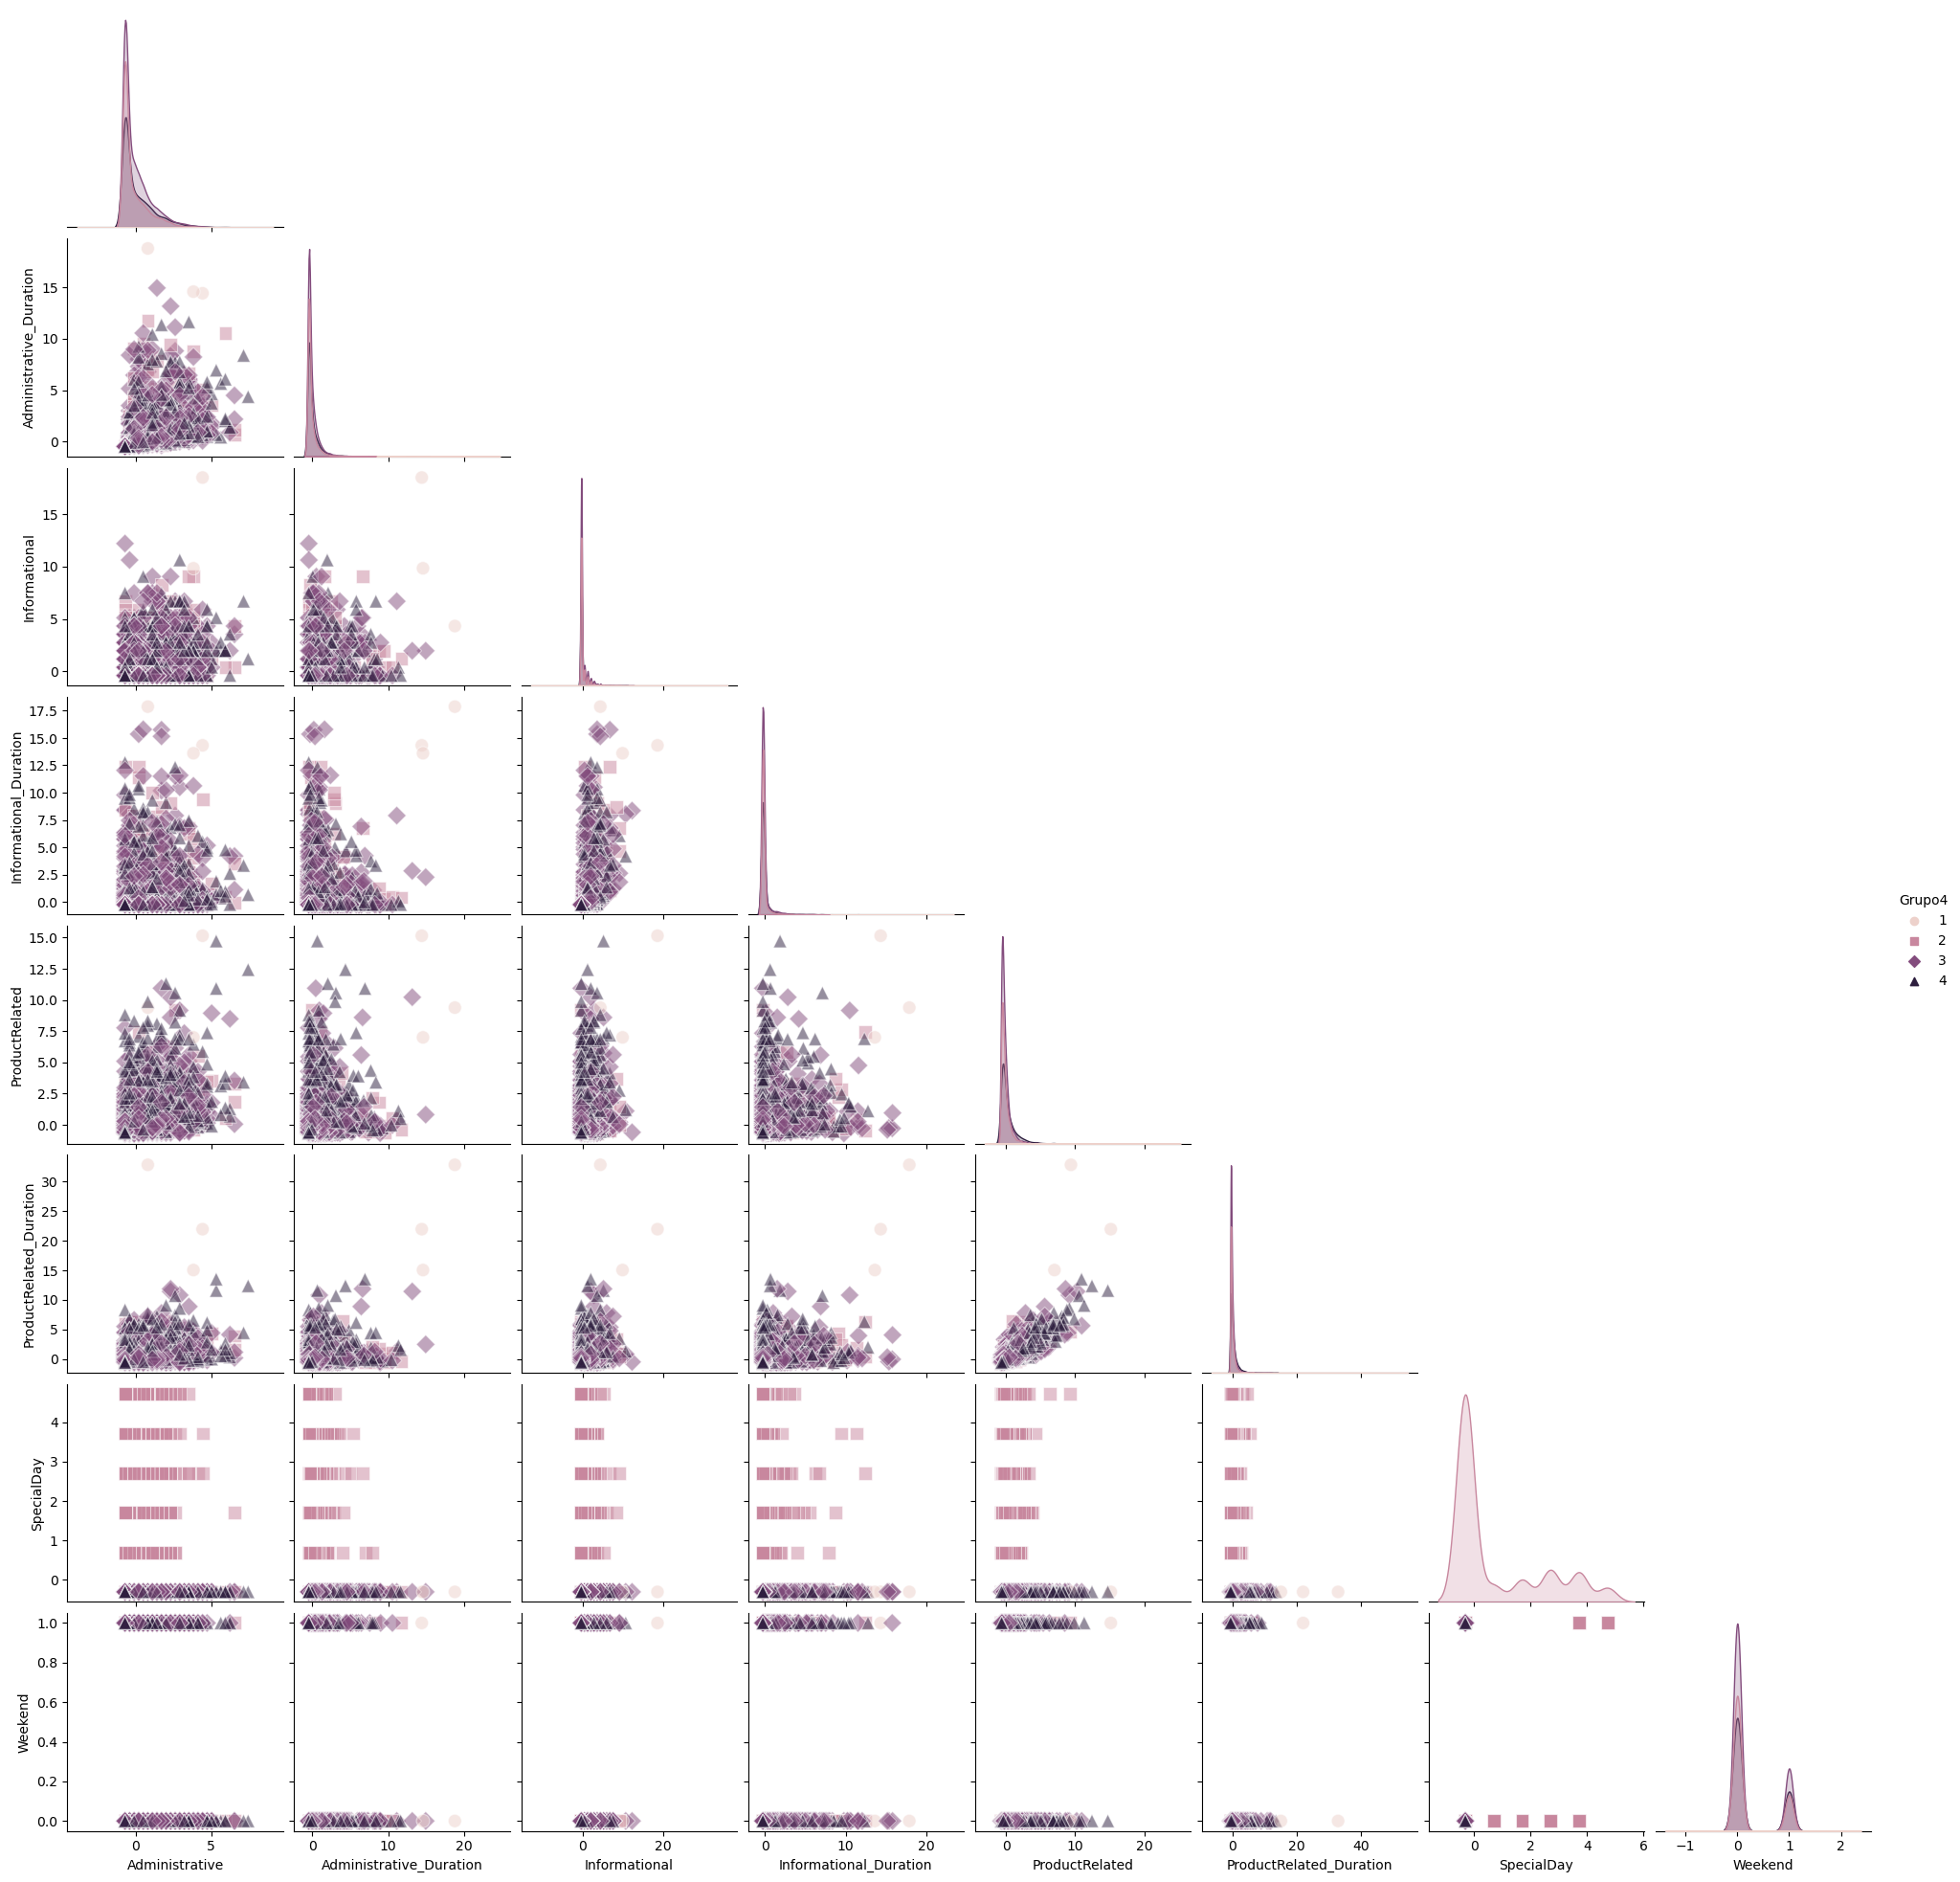

In [ ]:
#análise a partir de 4 grupos
df_grupo4 = df_variaveis.copy()
df_grupo4['Grupo4'] = grupos_4

species_to_marker = {1: 'o', 2: 's', 3: 'D', 4:'^'}
scatter_kws = {'s': 100, 'alpha': 0.5, 'style': df_grupo4['Grupo4'],  'markers': species_to_marker}


sns.pairplot(df_grupo4,
             hue="Grupo4",
             plot_kws=scatter_kws,
             corner=True)

**Avaliação**: O agrupamento de `3 níveis apresenta melhor organização separação` de valores, já o agrupamento de 4 níveis os grupos 3 e 4 acabam se mesclando pois são resultantes do mesmo grupo do nível 3.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [94]:
#avaliando com 3 grupos
df_grupo3[['BounceRates','Revenue']] = df[['BounceRates', 'Revenue']]
grupo_Revenue = df_grupo3.groupby('Grupo3')['Revenue'].mean().sort_values(ascending=False).index[0]
grupo_BounceRates = df_grupo3.groupby('Grupo3')['BounceRates'].mean().sort_values(ascending=False).index[0]

print(f'Dos clientes agrupados em 3 grupos, os que possuem maior conversão de compra são do grupo: {grupo_Revenue}\n')
print(f'Dos clientes agrupados em 3 grupos, os que possuem maior BounceRates são do grupo: {grupo_BounceRates}')

Dos clientes agrupados em 3 grupos, os que possuem maior conversão de compra são do grupo: 3

Dos clientes agrupados em 3 grupos, os que possuem maior BounceRates são do grupo: 2


In [95]:
#avaliando com 4 grupos
df_grupo4[['BounceRates','Revenue']] = df[['BounceRates', 'Revenue']]
grupo_Revenue = df_grupo4.groupby('Grupo4')['Revenue'].mean().sort_values(ascending=False).index[0]
grupo_BounceRates = df_grupo4.groupby('Grupo4')['BounceRates'].mean().sort_values(ascending=False).index[0]

print(f'Dos clientes agrupados em 3 grupos, os que possuem maior conversão de compra são do grupo: {grupo_Revenue}\n')
print(f'Dos clientes agrupados em 3 grupos, os que possuem maior BounceRates são do grupo: {grupo_BounceRates}')

Dos clientes agrupados em 3 grupos, os que possuem maior conversão de compra são do grupo: 4

Dos clientes agrupados em 3 grupos, os que possuem maior BounceRates são do grupo: 2
